# Summatory of Compound Events (CE)

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"

Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.


## Import Data

In [2]:
capa_tierra <- readRDS("../capa_tierra.rds")

In [3]:
pr_bin_10 <- readRDS("../binary/pr_bin_10.rds")
tmax_bin_90 <- readRDS("../binary/tmax_bin_90.rds")

In [3]:
CE_pr05_tmax95 <- readRDS("../compoundEvents/CE_num.rds")

In [4]:
CE_10 <- readRDS("../compoundEvents/CE10bis.rds")

## Function

The function `sum_events`, iter over the years and seasons of the compound_events data. For each grid the function *climatology(FUN = "sum")* it's applied and the compound_events are sum.

In [5]:
# Create a function that iter over the years and seasons of one data grid and execute the function climatology to summarize the data
sum_events <- function(grid) {
  grid1 <- grid
  # Iterate over the years in the grid
  for (year in names(grid)) {
    # Iterate over the seasons in each year
    for (season in names(grid[[year]])) {
      # Get the data of the current season
      season_data1 <- grid[[year]][[season]]
      # Apply the function to the data
      sum_events <- climatology(season_data1, clim.fun = list(FUN = "sum", na.rm = TRUE))
      sum_events <- gridArithmetics(sum_events, capa_tierra, operator = "*")
      # Update the data grid with the result
      grid1[[year]][[season]] <- sum_events
    }
  }
  # Return the updated grid
  return(grid1)
}

## Calculate

In [6]:
sum_10 <- sum_events(CE_10)

[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.


[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[2024-03-06 13:03:23] - Done.
[2024-03-06 13:03:23] - Computing climatology...
[20

In [7]:
saveRDS(sum_10, "sum10bis.rds", compress ='xz')

In [8]:
str(sum_10)

List of 45
 $ 1971:List of 4
  ..$ Winter:List of 4
  .. ..$ Variable:List of 2
  .. .. ..$ varName: chr "pr"
  .. .. ..$ level  : NULL
  .. .. ..- attr(*, "use_dictionary")= logi FALSE
  .. .. ..- attr(*, "description")= chr "Precipitation amount"
  .. .. ..- attr(*, "units")= chr "kg m-2"
  .. .. ..- attr(*, "longname")= chr "pr"
  .. .. ..- attr(*, "daily_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "monthly_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "verification_time")= chr "none"
  .. .. ..- attr(*, "subset")= chr "time"
  .. ..$ Data    : num [1, 1:79, 1:137] NA NA NA NA NA NA NA NA NA NA ...
  .. .. ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
  .. ..$ xyCoords:List of 2
  .. .. ..$ x: num [1:137] -9.5 -9.4 -9.3 -9.2 -9.1 -9 -8.9 -8.8 -8.7 -8.6 ...
  .. .. ..$ y: num [1:79] 36 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 ...
  .. .. ..- attr(*, "projection")= chr "LatLonProjection"
  .. .. ..- attr(*, "resX")= num 0.101
  .. .. ..- attr(*, "resY")= num 0.1
  .. .

### Done

In [20]:
sum_CE_pr0.1_tmax30 <- sum_events(CE_pr0.1_tmax30)

[2024-02-29 13:29:18] - Computing climatology...
[2024-02-29 13:29:18] - Done.
[2024-02-29 13:29:18] - Computing climatology...
[2024-02-29 13:29:18] - Done.
[2024-02-29 13:29:18] - Computing climatology...
[2024-02-29 13:29:18] - Done.
[2024-02-29 13:29:18] - Computing climatology...
[2024-02-29 13:29:18] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[2024-02-29 13:29:19] - Done.
[2024-02-29 13:29:19] - Computing climatology...
[20

In [21]:
saveRDS(sum_CE_pr0.1_tmax30, "sum_CE_pr0.1_tmax30.rds", compress = 'xz')

In [17]:
sum_CE_pr10_tmax90 <- sum_events(CE_pr10_tmax90)

[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.


[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:22] - Done.
[2024-02-29 13:28:22] - Computing climatology...
[2024-02-29 13:28:23] - Done.
[2024-02-29 13:28:23] - Computing climatology...
[2024-02-29 13:28:23] - Done.
[2024-02-29 13:28:23] - Computing climatology...
[2024-02-29 13:28:23] - Done.
[2024-02-29 13:28:23] - Computing climatology...
[2024-02-29 13:28:23] - Done.
[2024-02-29 13:28:23] - Computing climatology...
[20

In [11]:
print(sum_CE_pr05_tmax95$`1996`$Summer$Data)

, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA    NA
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]    NA     1     1    NA    NA    NA    NA    NA    NA    NA    NA    NA
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [,58] [,59] [,60] [,61] [,62]
[1,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
     [,63] [,64] [,65] [,66] [,67] [,68] [,69] [,70] [,71] [,72] [,73] [,74]
[1,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
     [,75] [,76] [,77] [,78] [,79]
[1,]    NA    NA    NA    NA

In [18]:
saveRDS(sum_CE_pr10_tmax90, "sum_CE_pr10_tmax90.rds", compress ='xz')

# Prueba (borrar)

In [1]:
sum_CE_num <- readRDS("sum_CE_10.rds")

In [6]:
capa_tierra <- readRDS("../capa_tierra.rds")

In [2]:
# Función para realizar bindGrid de una estación específica para varios años
bindGridEstaciones <- function(datos, estacion) {
  # Extraemos los años disponibles en los datos
  years <- names(datos)
  
  # Creamos una lista para almacenar los grids de cada año
  lista_grids <- list()
  
  # Iteramos sobre los años
  for (year in years) {
    # Obtenemos el grid para la estación especificada
    grid <- datos[[year]][[estacion]]
    # Lo añadimos a la lista
    lista_grids[[year]] <- grid
  }
  
  # Realizamos el bindGrid con todos los grids de la lista
  # resultado <- do.call(bindGrid, c(lista_grids, list(dimension = "time", skip.temporal.check = TRUE)))
  resultado <- bindGrid(lista_grids, dimension = "time", skip.temporal.check = TRUE)
  return(resultado)
}

In [7]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
dataPeriod <- list()

# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sum_CE_num, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  dataPeriod[[estacion]] <- datos_estacion
}


[2024-03-04 13:56:17] - Computing climatology...
[2024-03-04 13:56:17] - Done.
[2024-03-04 13:56:17] - Computing climatology...
[2024-03-04 13:56:17] - Done.
[2024-03-04 13:56:18] - Computing climatology...
[2024-03-04 13:56:18] - Done.
[2024-03-04 13:56:18] - Computing climatology...
[2024-03-04 13:56:18] - Done.


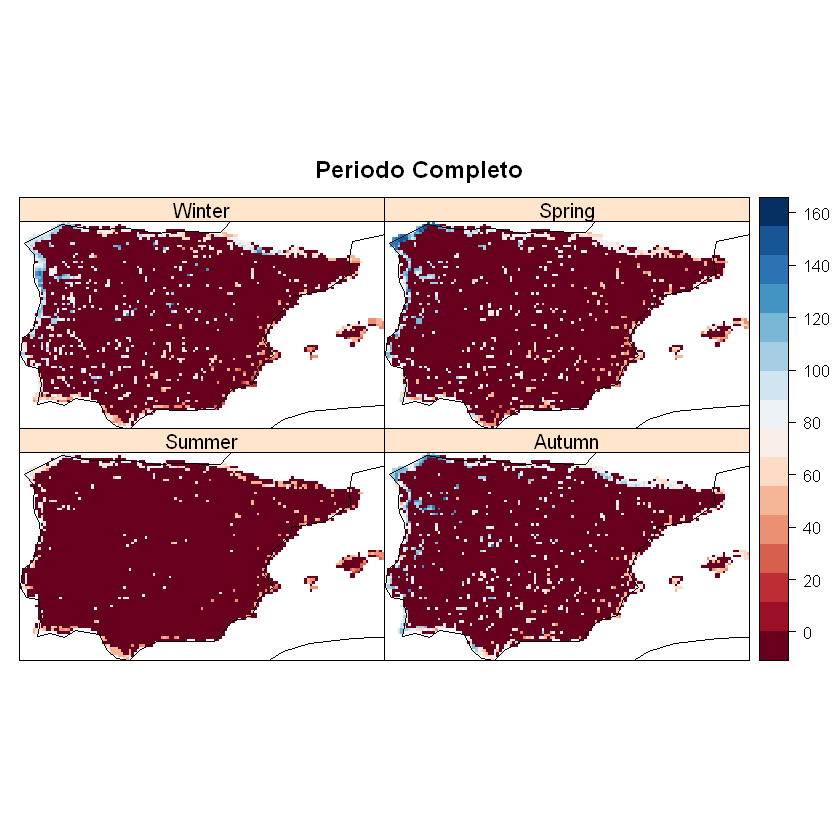

In [8]:
fullPeriod <- bindGrid(dataPeriod$Winter , dataPeriod$Spring, dataPeriod$Summer, dataPeriod$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(fullPeriod, backdrop.theme = "coastline", color.theme = "RdBu", names.attr = c("Winter", "Spring", "Summer", "Autumn"), main = "Periodo Completo", as.table = TRUE)